### DISCLAIMER

In [4]:
# source of dataset:
# https://www.kaggle.com/datasets/andrewmvd/pediatric-pneumonia-chest-xray
# https://www.kaggle.com/datasets/thomasdubail/chest-pneumonia-256x256

### IMPORT DEPENDENCIES

In [1]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
import urllib.request
import opendatasets as od

### DOWNLOAD AND PREPROCESS DATASET

In [2]:
# Define dataset url source
url_dataset1 = "https://www.kaggle.com/datasets/andrewmvd/pediatric-pneumonia-chest-xray"
url_dataset2 = 'https://www.kaggle.com/datasets/thomasdubail/chest-pneumonia-256x256'

In [9]:
# Download datasets
# insert kaggle username and kaggle key
od.download(url_dataset1)
od.download(url_dataset2)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/andrewmvd/pediatric-pneumonia-chest-xray


100%|██████████| 1.14G/1.14G [00:02<00:00, 515MB/s]



Dataset URL: https://www.kaggle.com/datasets/thomasdubail/chest-pneumonia-256x256


 53%|█████▎    | 89.0M/168M [00:00<00:00, 875MB/s]

100%|██████████| 168M/168M [00:00<00:00, 924MB/s] 


In [13]:
# Define dataset folder for train and test
os.mkdir('TRAIN')
os.mkdir('TEST')
os.mkdir('TRAIN/NORMAL')
os.mkdir('TRAIN/PNEUMONIA')
os.mkdir('TEST/NORMAL')
os.mkdir('TEST/PNEUMONIA')

In [14]:
# Move train and test dataset with label PNEUMONIA

# move train data
train1 = 'chest-pneumonia-256x256/Data/train/pneumonia'
train2 = 'pediatric-pneumonia-chest-xray/Pediatric Chest X-ray Pneumonia/train/PNEUMONIA'

train_pneumonia_path = 'TRAIN/PNEUMONIA'

for f in os.listdir(train1):
    src_path = os.path.join(train1, f)
    dst_path = os.path.join(train_pneumonia_path, f)
    shutil.copy(src_path, dst_path)

for f in os.listdir(train2):
    src_path = os.path.join(train2, f)
    dst_path = os.path.join(train_pneumonia_path, f)
    shutil.copy(src_path, dst_path)

# move test data
test1 = 'chest-pneumonia-256x256/Data/test/pneumonia'
test2 = 'pediatric-pneumonia-chest-xray/Pediatric Chest X-ray Pneumonia/test/PNEUMONIA'

test_pneumonia_path = 'TEST/PNEUMONIA'

for f in os.listdir(test1):
    src_path = os.path.join(test1, f)
    dst_path = os.path.join(test_pneumonia_path, f)
    shutil.copy(src_path, dst_path)


for f in os.listdir(test2):
    src_path = os.path.join(test2, f)
    dst_path = os.path.join(test_pneumonia_path, f)
    shutil.copy(src_path, dst_path)

In [15]:
# Move train and test dataset with label NORMAL

# move train data
train3 = 'chest-pneumonia-256x256/Data/train/normal'
train4 = 'pediatric-pneumonia-chest-xray/Pediatric Chest X-ray Pneumonia/train/NORMAL'

train_normal_path = 'TRAIN/NORMAL'

for f in os.listdir(train3):
    src_path = os.path.join(train3, f)
    dst_path = os.path.join(train_normal_path, f)
    shutil.copy(src_path, dst_path)


for f in os.listdir(train4):
    src_path = os.path.join(train4, f)
    dst_path = os.path.join(train_normal_path, f)
    shutil.copy(src_path, dst_path)

# move test data
test3 = 'chest-pneumonia-256x256/Data/test/normal'
test4 = 'pediatric-pneumonia-chest-xray/Pediatric Chest X-ray Pneumonia/test/NORMAL'

test_normal_path = 'TEST/NORMAL'

for f in os.listdir(train3):
    src_path = os.path.join(train3, f)
    dst_path = os.path.join(test_normal_path, f)
    shutil.copy(src_path, dst_path)

for f in os.listdir(train4):
    src_path = os.path.join(train4, f)
    dst_path = os.path.join(test_normal_path, f)
    shutil.copy(src_path, dst_path)

In [16]:
# Remove original dataset folders
shutil.rmtree('chest-pneumonia-256x256', ignore_errors=True)
shutil.rmtree('pediatric-pneumonia-chest-xray', ignore_errors=True)

### CHECK DATASET

In [55]:
base_dir = os.getcwd()
print("The base directory for this project is :", base_dir, "\n")

train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

print(f"There are {len(os.listdir(train_pneumonia_dir))} images of pneumonia for training.")
print(f"There are {len(os.listdir(test_pneumonia_dir))} images of pneumonia for test.")
print(f"There are {len(os.listdir(train_normal_dir))} images of normal for training.")
print(f"There are {len(os.listdir(test_normal_dir))} images of normal for test.")

The base directory for this project is : c:\Users\ASUS\Documents\GitHub\PneumoVision-Bangkit-Capstone-ML 

There are 7289 images of pneumonia for training.
There are 780 images of pneumonia for test.
There are 2154 images of normal for training.
There are 2154 images of normal for test.


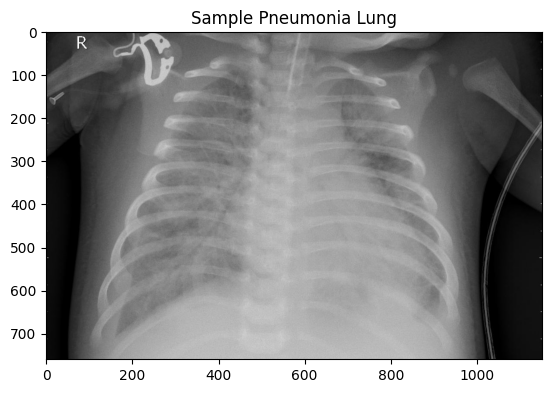

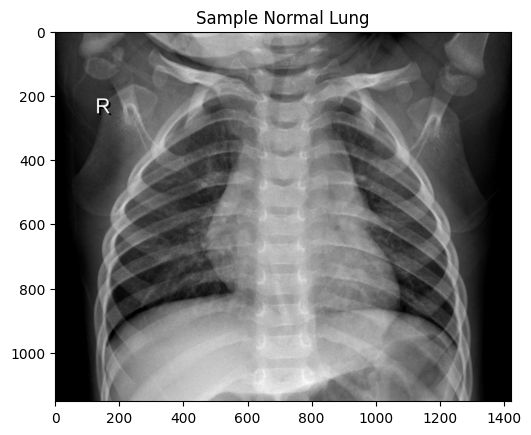

In [56]:
def check_sample(pneumonia_dir, normal_dir, index:int):
    plt.imshow(load_img(f"{os.path.join(pneumonia_dir, os.listdir(pneumonia_dir)[index])}"))
    plt.title("Sample Pneumonia Lung")
    plt.show()

    plt.imshow(load_img(f"{os.path.join(normal_dir, os.listdir(normal_dir)[index])}"))
    plt.title("Sample Normal Lung")
    plt.show()

check_sample(train_pneumonia_dir, train_normal_dir, 1)

In [57]:
#Check Image Shape
import numpy as np;

def check_image_shape(index1:int, index2:int, index3:int):
    index = np.random.randint(low=0, high=len(os.listdir(train_pneumonia_dir)), size=3)
    sample_image1  = load_img(f"{os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[index[0]])}")
    sample_image2  = load_img(f"{os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[index[1]])}")
    sample_image3  = load_img(f"{os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[index[2]])}")

    # Check image shape
    sample_array = [img_to_array(sample_image1), img_to_array(sample_image2), img_to_array(sample_image3)]

    for i in range(len(sample_array)):
        print(f"Image {index[i]} has shape: {sample_array[i].shape}")
    
    print("**this show each image have different shapes, we have to process it so they are in one uniform shape" )

check_image_shape(1,2,4)

Image 3112 has shape: (1288, 1544, 3)
Image 4785 has shape: (824, 1184, 3)
Image 1941 has shape: (1032, 1448, 3)
**this show each image have different shapes, we have to process it so they are in one uniform shape


### IMAGE AUGMENTATION

In [59]:
def create_image_generator(train_dir, test_dir):
    train_datagen = ImageDataGenerator(
        rescale = 1./255.,      #normalize image pixel from 0-255 0-1
        rotation_range = 40,    #randomly rotate images by up to ±40 degrees
        width_shift_range = 0.2,    #shift images horizontally or vertically by 20%
        height_shift_range = 0.2,
        shear_range = 0.2,      #shear transformation (slanting the image)
        zoom_range = 0.2,       #random zoom up to 20%
        horizontal_flip = True  #randomly flip images left-right
    )
    
    test_datagen = ImageDataGenerator(
        rescale = 1./255.       #normalize image pixel from 0-255 0-1
        )
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size = 20,        #create image batch size of 20
        class_mode = 'binary',  #we have 2 label
        target_size = (150,150) #resizes all images to 150x150 pixels
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        batch_size = 20,        #create image batch size of 20
        class_mode = 'binary',  #we have 2 label
        target_size = (150,150) #resizes all images to 150x150 pixels
    )

    return train_generator, test_generator
    

### CREATE MODEL

In [33]:
# Get the pre-trained model weights on url below
inceptionv3 = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
urllib.request.urlretrieve(inceptionv3, 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model =  InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)  #make sure the input image size match size in image dataset generator

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer_output = pre_trained_model.get_layer('mixed2').output

In [38]:
# Create model sequential architecture
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(last_layer_output)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)

x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)

x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [60]:
model = tf.keras.Model(pre_trained_model.input, x)

In [61]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9
)

optimizer = SGD(learning_rate=lr_schedule, momentum=0.9)
loss_fn = BinaryCrossentropy()

model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

In [47]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_284 (Conv2D) │ (None, 74, 74,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │         96 │ conv2d_284[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_282      │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_285 (Conv2D) │ (None, 72, 72,    │      9,216 │ activation_282[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_285[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_283      │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_286 (Conv2D) │ (None, 72, 72,    │     18,432 │ activation_283[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_286[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_284      │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 35, 35,    │          0 │ activation_284[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_287 (Conv2D) │ (None, 35, 35,    │      5,120 │ max_pooling2d_14… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_287[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_285      │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_288 (Conv2D) │ (None, 33, 33,    │    138,240 │ activation_285[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_288[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_286      │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 1,395,393 (5.32 MB)

 Trainable params: 402,017 (1.53 MB)

 Non-trainable params: 993,376 (3.79 MB)

In [64]:
EPOCHS = 50

train_generator, test_generator = create_image_generator(train_dir, test_dir)

history = model.fit(train_generator,
                    epochs=EPOCHS,
                    validation_data=test_generator,
                    verbose=1
                    )

Found 9443 images belonging to 2 classes.
Found 2934 images belonging to 2 classes.
Epoch 1/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 280s 593ms/step - accuracy: 0.9330 - loss: 0.1784 - val_accuracy: 0.9315 - val_loss: 0.1815
Epoch 2/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 187s 396ms/step - accuracy: 0.9488 - loss: 0.1390 - val_accuracy: 0.9819 - val_loss: 0.0541
Epoch 3/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 188s 397ms/step - accuracy: 0.9556 - loss: 0.1271 - val_accuracy: 0.9577 - val_loss: 0.1251
Epoch 4/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 189s 400ms/step - accuracy: 0.9610 - loss: 0.1105 - val_accuracy: 0.9836 - val_loss: 0.0522
Epoch 5/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 189s 399ms/step - accuracy: 0.9581 - loss: 0.1089 - val_accuracy: 0.9649 - val_loss: 0.1183
Epoch 6/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 188s 398ms/step - accuracy: 0.9632 - loss: 0.1001 - val_accuracy: 0.9547 - val_loss: 0.1102
Epoch 7/50
473/473 ━━━━━━━━━━━━━━━━━━━━ 197s 416ms/step - accuracy: 0.9693 - loss: 0.0904 - val_accuracy: 0.9755 - val_loss:

### EVALUATION

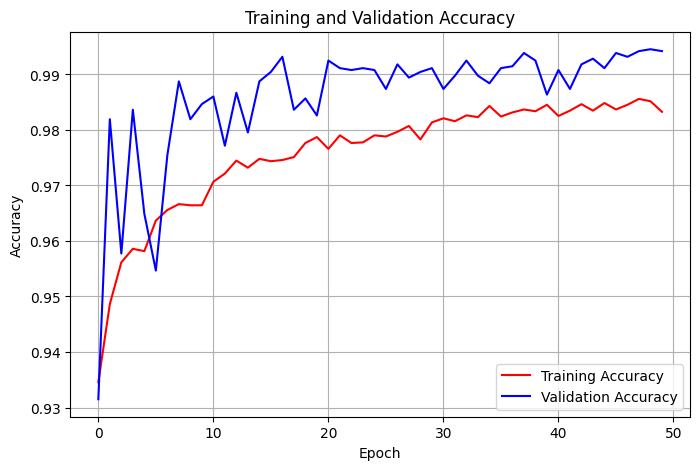

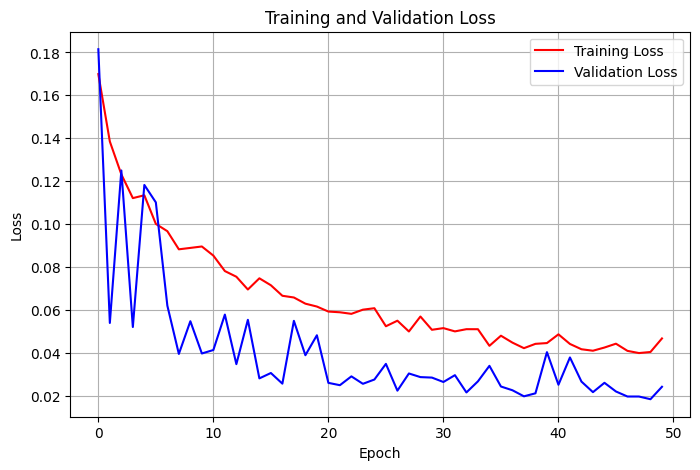

In [66]:
def check_evaluation():
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs=range(len(acc)) # Get number of epochs

    # Plot training and validation accuracy per epoch
    plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
    plt.plot(epochs, acc, 'r', label="Training Accuracy")
    plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()  # Add the legend here
    plt.grid(True)  # Add grid lines for better visualization
    plt.show()
    print("")

    # Plot training and validation loss per epoch
    plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
    plt.plot(epochs, loss, 'r', label="Training Loss")
    plt.plot(epochs, val_loss, 'b', label="Validation Loss")
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()  # Add the legend here
    plt.grid(True)  # Add grid lines for better visualization
    plt.show()

check_evaluation()

### SAVE MODEL

In [68]:
model.save('model_capstone.h5')